In [1]:
import chess
from bot import ChessBot
import numpy as np
from pystockfish import Engine
from IPython.display import clear_output
from IPython.core.display import display

board = chess.Board()
gruefish = ChessBot()

Using TensorFlow backend.


In [2]:
gruefish_black = ChessBot()
gruefish_black.explore = 0.5
gruefish_black.init_explore = 0.6

In [2]:
shitfish = Engine(depth=10, param={"Threads": 1, "Hash": 10})
shitfish.newgame()

In [2]:
stockfish = Engine(depth=20, param={"Threads": 12})
stockfish.newgame()

total simulations: 236 depth: 8
[{'total_score': 0.20135435358588605, 'mcts_score': 0.010597597557151898, 'visit_count': 19, 'move': 'h2h3', 'score': 0.029554492}, {'total_score': 0.20063607492246616, 'mcts_score': 0.010559793416971903, 'visit_count': 19, 'move': 'b3b4', 'score': 0.027231419}, {'total_score': 0.1683865346408987, 'mcts_score': 0.0093548074800499283, 'visit_count': 18, 'move': 'g2g1', 'score': 0.0099805268}]
lb: -0.150279089847 ub: 0.125054366348
total simulations: 477 depth: 8
[{'total_score': 0.33336825120993685, 'mcts_score': 0.010753814555159254, 'visit_count': 31, 'move': 'h2h3', 'score': 0.029554492}, {'total_score': 0.32959573539719311, 'mcts_score': 0.010632120496683649, 'visit_count': 31, 'move': 'b3b4', 'score': 0.027231419}, {'total_score': 0.28575680242660284, 'mcts_score': 0.0095252267475534284, 'visit_count': 30, 'move': 'g2g1', 'score': 0.0099805268}]
best move:
{'total_score': 0.26475419902605546, 'mcts_score': 0.0088251399675351814, 'visit_count': 30, 'm

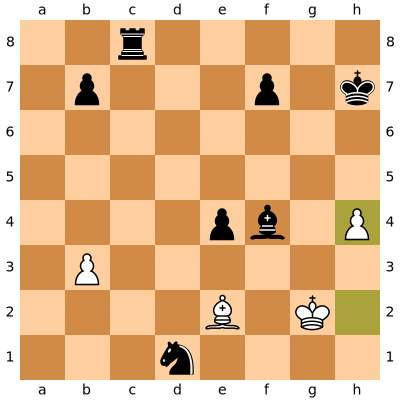

In [82]:
if board.is_game_over():
    print(board.result())
else:
    if board.turn == chess.WHITE:
        move = gruefish.best_move(board, time_limit=30, depth=8, debug=True)
        board.push_uci(move['move'])
    else:
        shitfish.setfenposition(board.fen())
        board.push_uci(shitfish.bestmove()['move'])

board

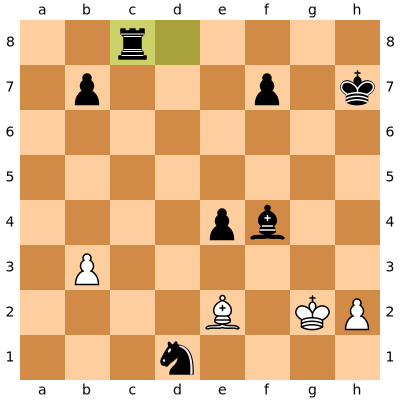

In [81]:
board.pop()
board.push_uci('d8c8')
board

In [30]:
board.move_stack

[Move.from_uci('e2e4'),
 Move.from_uci('e7e5'),
 Move.from_uci('g1f3'),
 Move.from_uci('d7d6'),
 Move.from_uci('d2d4'),
 Move.from_uci('e5d4'),
 Move.from_uci('f3d4'),
 Move.from_uci('g8f6'),
 Move.from_uci('b1c3'),
 Move.from_uci('c7c6'),
 Move.from_uci('f1e2'),
 Move.from_uci('f8e7'),
 Move.from_uci('e1g1')]

In [4]:
fen = board.fen()
print(fen)
fen = '8/8/6p1/8/p1R3Pn/1p2K3/8/3k4 w - - 18 80'
board = chess.Board(fen=fen)

8/8/6p1/8/p1R3Pn/1p2K3/8/3k4 w - - 18 80


In [13]:
board.reset()

In [14]:
gruefish.clear_cache()

total simulations: 200 depth: 7
[{'move': 'e2e4', 'total_score': 30.12171105578355, 'mcts_score': 0.53788769742470621, 'visit_count': 56, 'score': 0.68959379}, {'move': 'd2d4', 'total_score': 29.500883483309618, 'mcts_score': 0.53637969969653854, 'visit_count': 55, 'score': 0.12624529}, {'move': 'g1f3', 'total_score': 28.333144243338872, 'mcts_score': 0.53458762723280895, 'visit_count': 53, 'score': 0.16252536}]


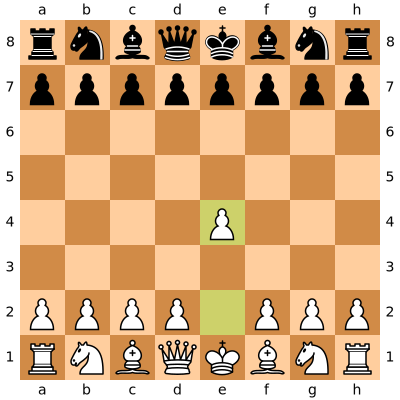

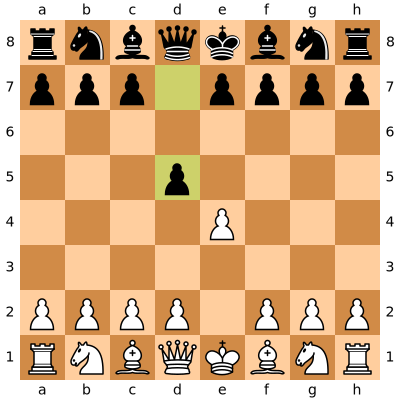

total simulations: 151 depth: 7
[{'move': 'e4d5', 'total_score': 44.692702903898052, 'mcts_score': 0.56573041650503864, 'visit_count': 79, 'score': 0.83034456}, {'move': 'd2d4', 'total_score': 14.984117337288149, 'mcts_score': 0.51669370128579828, 'visit_count': 29, 'score': 0.041885369}, {'move': 'g1f3', 'total_score': 9.7281923736689215, 'mcts_score': 0.48640961868344607, 'visit_count': 20, 'score': 0.0098021068}]


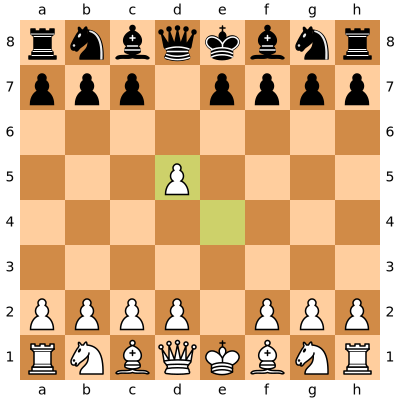

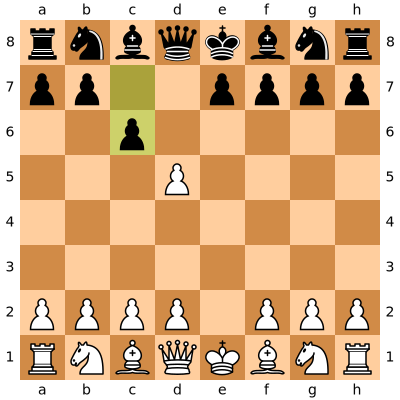

total simulations: 221 depth: 7
[{'move': 'd5c6', 'total_score': 59.581928342979054, 'mcts_score': 0.58992008260375306, 'visit_count': 101, 'score': 0.65899533}, {'move': 'g1f3', 'total_score': 15.923986827223127, 'mcts_score': 0.53079956090743752, 'visit_count': 30, 'score': 0.078762531}, {'move': 'd5d6', 'total_score': 15.346299068887161, 'mcts_score': 0.52918272651335041, 'visit_count': 29, 'score': 0.0066284453}]


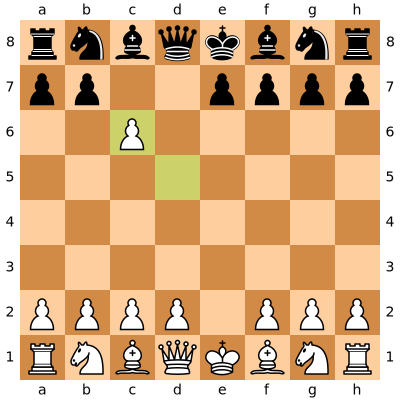

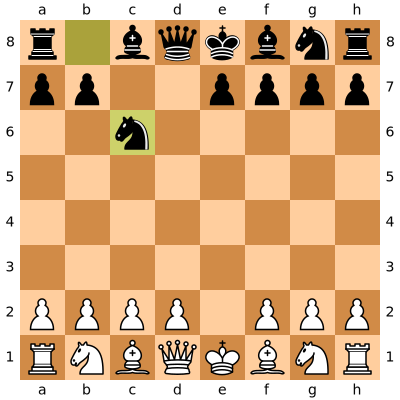

total simulations: 244 depth: 7
[{'move': 'g1f3', 'total_score': 58.165618303605896, 'mcts_score': 0.61226966635374624, 'visit_count': 95, 'score': 0.34545398}, {'move': 'f1b5', 'total_score': 43.310396448802145, 'mcts_score': 0.60153328401114092, 'visit_count': 72, 'score': 0.38690931}, {'move': 'b1c3', 'total_score': 16.65339439947844, 'mcts_score': 0.55511314664928135, 'visit_count': 30, 'score': 0.21397626}]


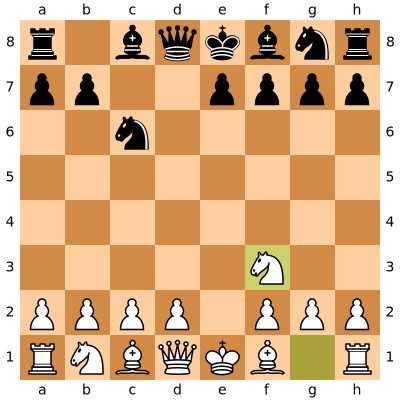

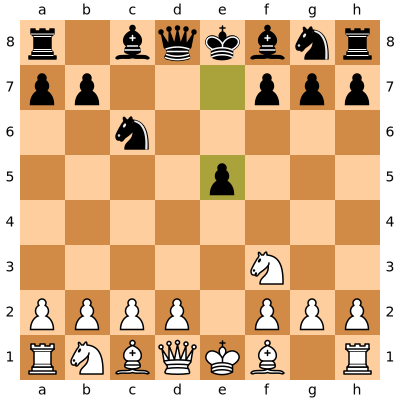

total simulations: 244 depth: 7
[{'move': 'b1c3', 'total_score': 77.719678001896483, 'mcts_score': 0.59784367693766527, 'visit_count': 130, 'score': 0.0982728}, {'move': 'f1b5', 'total_score': 57.648726793441618, 'mcts_score': 0.58825231421879198, 'visit_count': 98, 'score': 0.87973678}, {'move': 'f1c4', 'total_score': 7.7296842600751692, 'mcts_score': 0.48310526625469807, 'visit_count': 16, 'score': 0.013253588}]


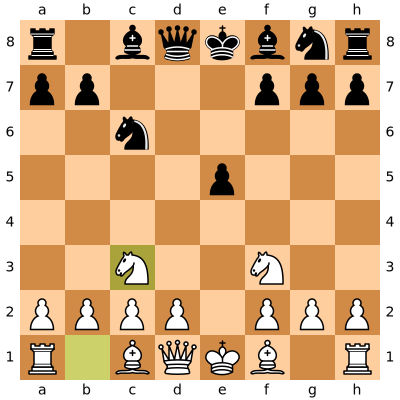

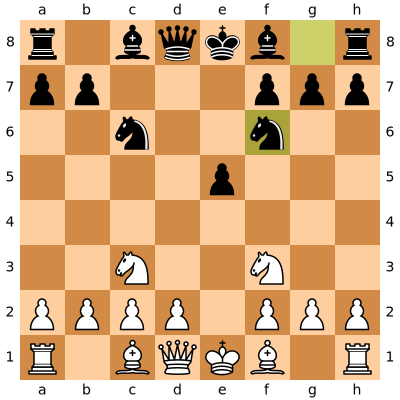

total simulations: 241 depth: 7
[{'move': 'f1b5', 'total_score': 124.91832262723992, 'mcts_score': 0.59202996505800909, 'visit_count': 211, 'score': 0.97200042}, {'move': 'f1c4', 'total_score': 15.341665432194917, 'mcts_score': 0.51138884773983062, 'visit_count': 30, 'score': 0.02048821}, {'move': 'a1b1', 'total_score': 0, 'mcts_score': 0, 'visit_count': 0, 'score': 6.0278111e-08}]


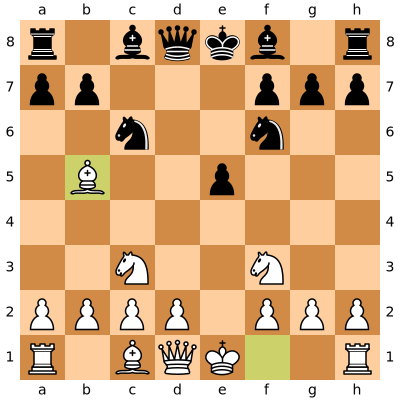

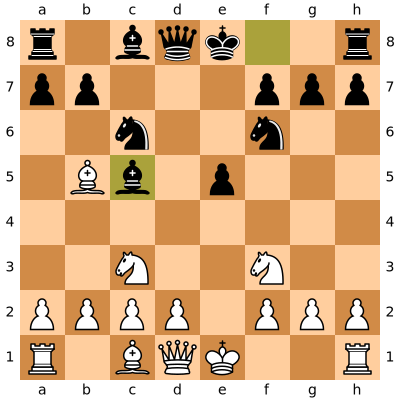

total simulations: 245 depth: 7
[{'move': 'b5c6', 'total_score': 98.726443909965994, 'mcts_score': 0.69039471265710484, 'visit_count': 143, 'score': 0.12911147}, {'move': 'e1g1', 'total_score': 40.914898642581278, 'mcts_score': 0.65991772004163352, 'visit_count': 62, 'score': 0.19553959}, {'move': 'f3e5', 'total_score': 11.773017833964818, 'mcts_score': 0.58865089169824092, 'visit_count': 20, 'score': 0.64845991}]


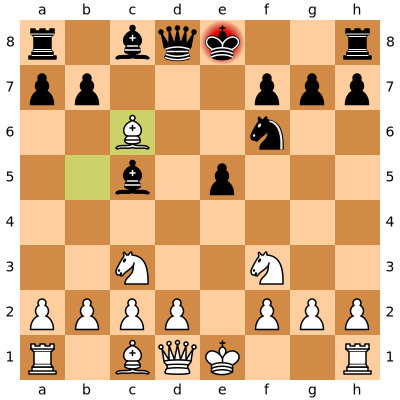

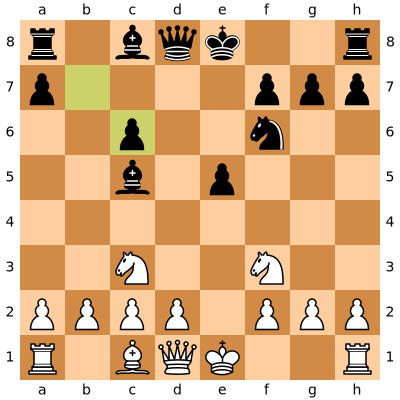

total simulations: 319 depth: 7
[{'move': 'e1g1', 'total_score': 112.48051439286665, 'mcts_score': 0.6616500846639215, 'visit_count': 170, 'score': 0.37169179}, {'move': 'd2d3', 'total_score': 41.454293871482641, 'mcts_score': 0.62809536168913094, 'visit_count': 66, 'score': 0.03664431}, {'move': 'f3e5', 'total_score': 32.043193360695454, 'mcts_score': 0.61621525693645107, 'visit_count': 52, 'score': 0.55065811}]


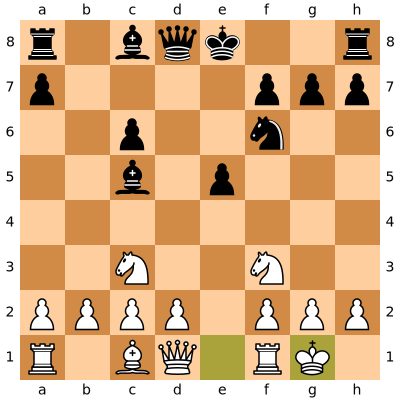

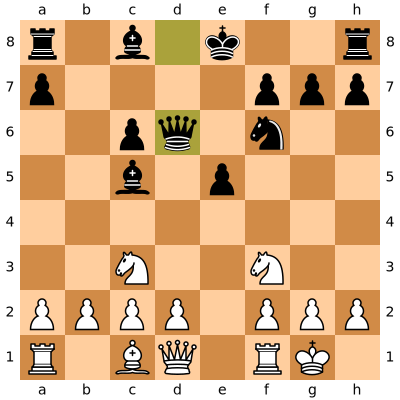

total simulations: 167 depth: 7
[{'move': 'f1e1', 'total_score': 35.234824422247129, 'mcts_score': 0.76597444396189407, 'visit_count': 46, 'score': 0.26471949}, {'move': 'd1e2', 'total_score': 27.129776995236142, 'mcts_score': 0.75360491653433725, 'visit_count': 36, 'score': 0.1521859}, {'move': 'c3a4', 'total_score': 15.861055690634251, 'mcts_score': 0.72095707684701138, 'visit_count': 22, 'score': 0.068550169}]


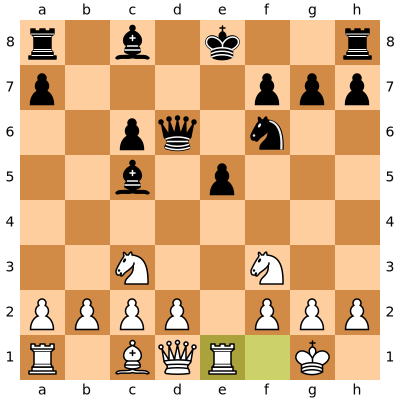

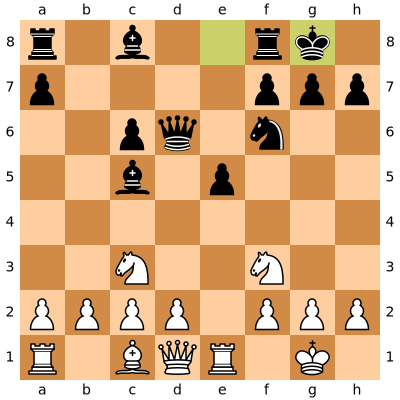

total simulations: 166 depth: 7
[{'move': 'f3e5', 'total_score': 34.58129724224581, 'mcts_score': 0.69162594484491624, 'visit_count': 50, 'score': 0.60647148}, {'move': 'h2h3', 'total_score': 17.307059890118225, 'mcts_score': 0.66565614961993169, 'visit_count': 26, 'score': 0.0074345632}, {'move': 'd2d3', 'total_score': 18.522219056268987, 'mcts_score': 0.66150782343817816, 'visit_count': 28, 'score': 0.15270025}]


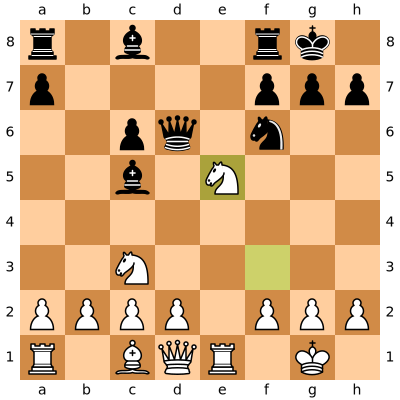

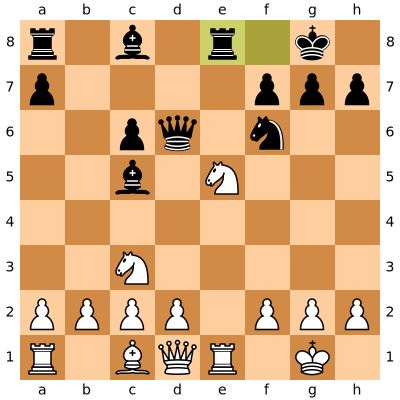

total simulations: 159 depth: 7
[{'move': 'd2d4', 'total_score': 22.013494393356794, 'mcts_score': 0.62895698266733702, 'visit_count': 35, 'score': 0.35249642}, {'move': 'e5f3', 'total_score': 19.967199508873172, 'mcts_score': 0.62397498465228662, 'visit_count': 32, 'score': 0.039323498}, {'move': 'e5c4', 'total_score': 14.441664638421319, 'mcts_score': 0.60173602660088832, 'visit_count': 24, 'score': 0.072008051}]


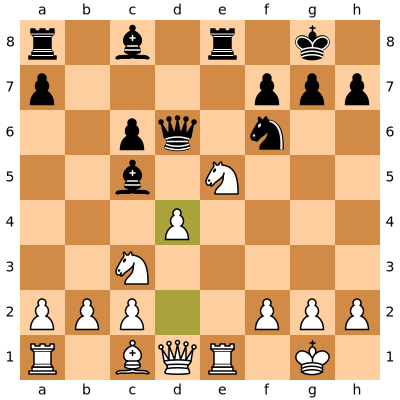

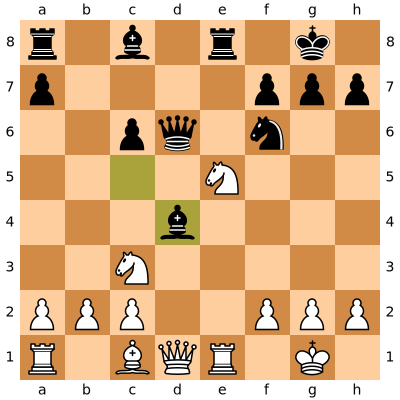

total simulations: 159 depth: 7
[{'move': 'e5f3', 'total_score': 37.166885925697237, 'mcts_score': 0.60929321189667607, 'visit_count': 61, 'score': 0.048553433}, {'move': 'c1f4', 'total_score': 27.352420086232122, 'mcts_score': 0.59461782796156792, 'visit_count': 46, 'score': 0.60195804}, {'move': 'c3e4', 'total_score': 5.9924624884777575, 'mcts_score': 0.49937187403981315, 'visit_count': 12, 'score': 0.010521939}]


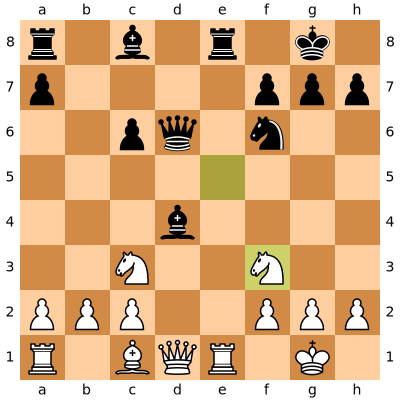

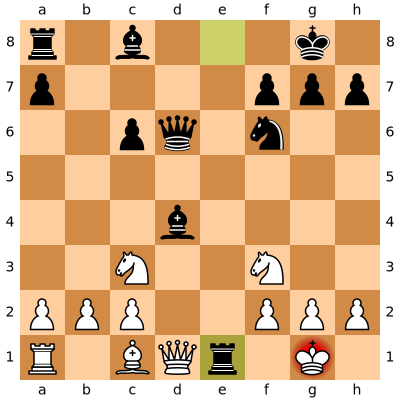

total simulations: 207 depth: 7
[{'move': 'd1e1', 'total_score': 108.9160497408499, 'mcts_score': 0.54731683286859245, 'visit_count': 199, 'score': 0.61451101}, {'move': 'f3e1', 'total_score': 2.8076984441846125, 'mcts_score': 0.35096230552307656, 'visit_count': 8, 'score': 0.38548896}]


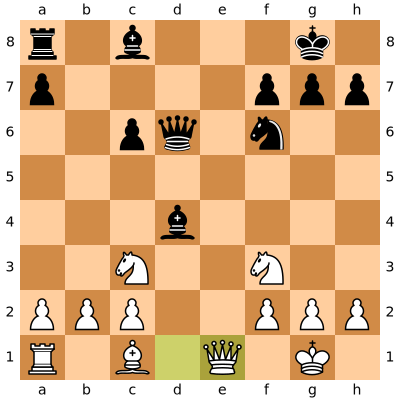

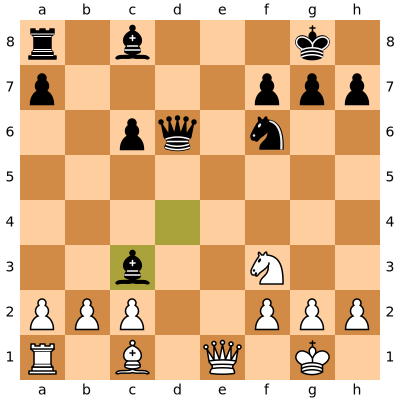

total simulations: 289 depth: 7
[{'move': 'e1c3', 'total_score': 161.71974369507885, 'mcts_score': 0.63171774880890175, 'visit_count': 256, 'score': 0.65916371}, {'move': 'b2c3', 'total_score': 12.223391835894056, 'mcts_score': 0.50930799316225228, 'visit_count': 24, 'score': 0.28164494}, {'move': 'c1d2', 'total_score': 0.63019299566922526, 'mcts_score': 0.21006433188974175, 'visit_count': 3, 'score': 0.0055004009}]


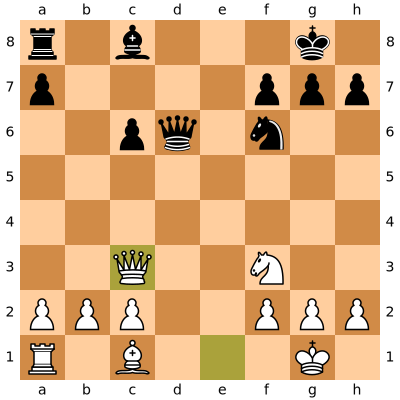

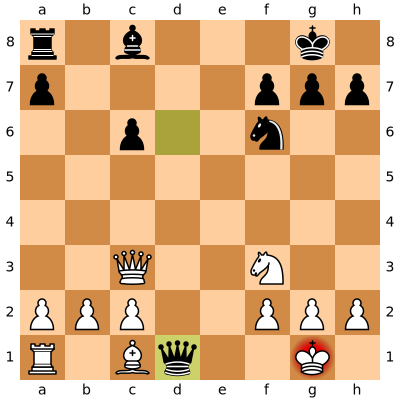

total simulations: 255 depth: 7
[{'move': 'c3e1', 'total_score': 196.56458343611493, 'mcts_score': 0.78625833374445975, 'visit_count': 250, 'score': 0.30175734}, {'move': 'f3e1', 'total_score': 2.4875490325619465, 'mcts_score': 0.4975098065123893, 'visit_count': 5, 'score': 0.6982426}]


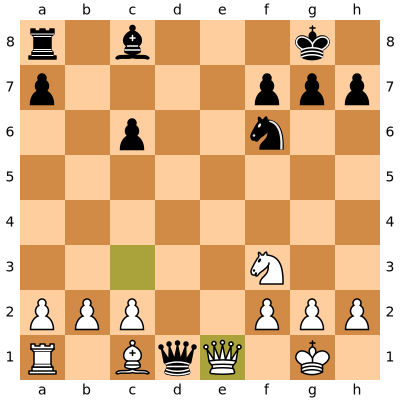

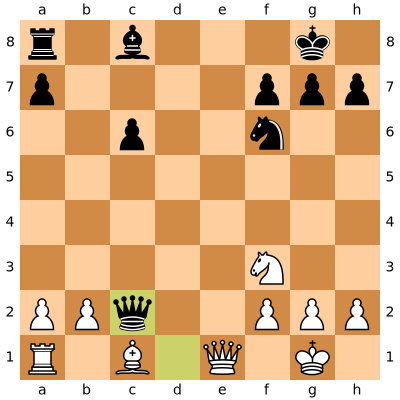

total simulations: 202 depth: 7
[{'move': 'c1g5', 'total_score': 22.958376342212919, 'mcts_score': 0.71744926069415371, 'visit_count': 32, 'score': 0.14149137}, {'move': 'f3d4', 'total_score': 16.663753957078637, 'mcts_score': 0.69432308154494315, 'visit_count': 24, 'score': 0.077763617}, {'move': 'e1d2', 'total_score': 15.200984051988947, 'mcts_score': 0.69095382054495214, 'visit_count': 22, 'score': 0.029872434}]


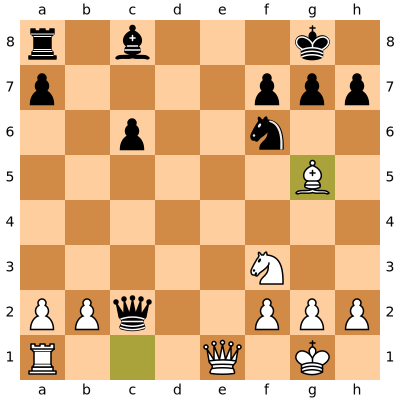

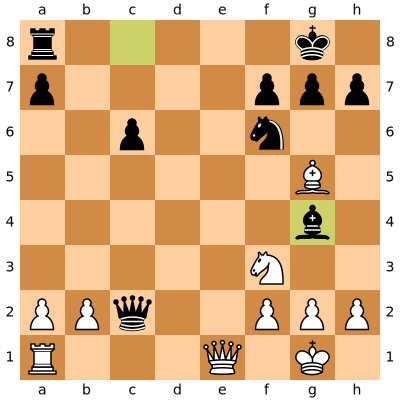

total simulations: 158 depth: 7
[{'move': 'g5f6', 'total_score': 65.44268265777616, 'mcts_score': 0.71133350714974086, 'visit_count': 92, 'score': 0.41171786}, {'move': 'f3e5', 'total_score': 15.407294332981799, 'mcts_score': 0.64197059720757499, 'visit_count': 24, 'score': 0.035554685}, {'move': 'e1c1', 'total_score': 4.8017925582953938, 'mcts_score': 0.53353250647726602, 'visit_count': 9, 'score': 0.024601366}]


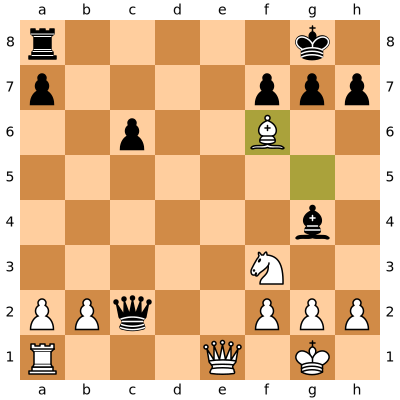

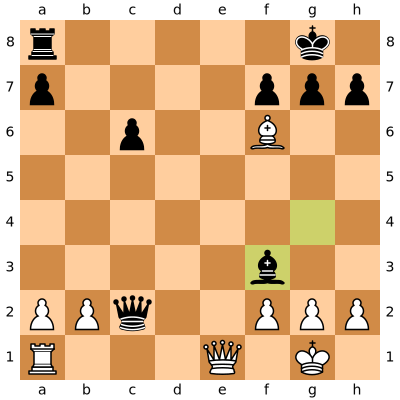

total simulations: 245 depth: 7
[{'move': 'e1c3', 'total_score': 91.575444479569242, 'mcts_score': 0.7326035558365539, 'visit_count': 125, 'score': 0.015088321}, {'move': 'f6g7', 'total_score': 15.645291250288617, 'mcts_score': 0.65188713542869237, 'visit_count': 24, 'score': 0.011173875}, {'move': 'f6c3', 'total_score': 13.167152759577156, 'mcts_score': 0.59850694361714352, 'visit_count': 22, 'score': 0.09058813}]


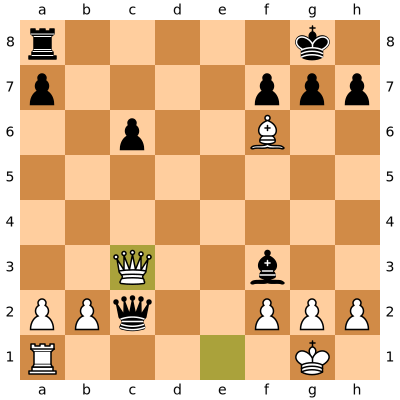

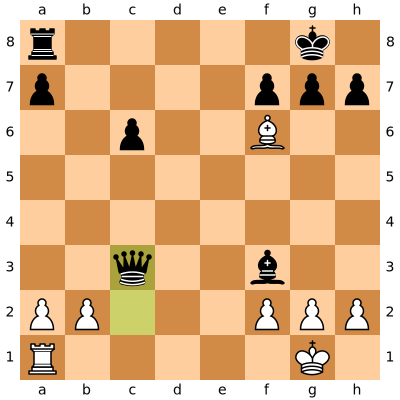

total simulations: 193 depth: 7
[{'move': 'f6c3', 'total_score': 151.60544194356976, 'mcts_score': 0.79792337865036711, 'visit_count': 190, 'score': 0.94608253}, {'move': 'b2c3', 'total_score': 0.53211805139334856, 'mcts_score': 0.26605902569667428, 'visit_count': 2, 'score': 0.041883599}, {'move': 'g2f3', 'total_score': 0.013237632520031184, 'mcts_score': 0.013237632520031184, 'visit_count': 1, 'score': 0.006584438}]


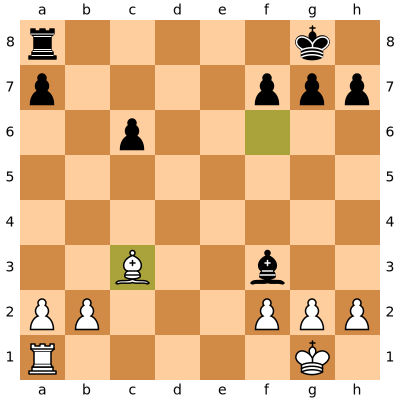

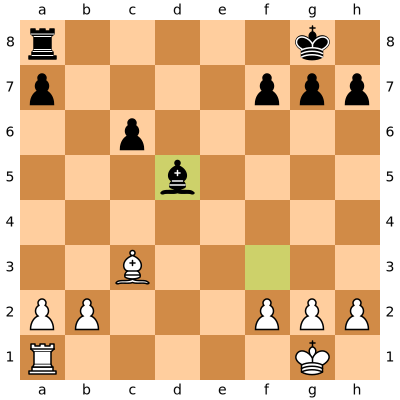

total simulations: 244 depth: 7
[{'move': 'f2f3', 'total_score': 46.721749683661102, 'mcts_score': 0.74161507434382701, 'visit_count': 63, 'score': 0.31477669}, {'move': 'a2a3', 'total_score': 20.264241880117304, 'mcts_score': 0.69876696138335526, 'visit_count': 29, 'score': 0.029612172}, {'move': 'h2h4', 'total_score': 19.563409318845494, 'mcts_score': 0.69869318995876761, 'visit_count': 28, 'score': 0.0062271366}]


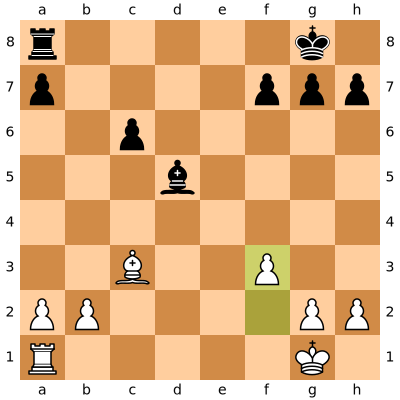

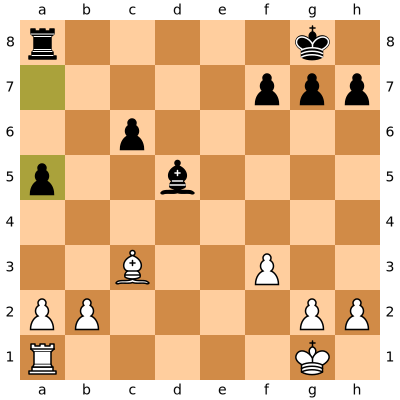

total simulations: 166 depth: 7
[{'move': 'a2a4', 'total_score': 36.509108053010067, 'mcts_score': 0.74508383781653198, 'visit_count': 49, 'score': 0.10003626}, {'move': 'g1f2', 'total_score': 23.820509718581523, 'mcts_score': 0.72183362783580374, 'visit_count': 33, 'score': 0.47377986}, {'move': 'h2h4', 'total_score': 15.294833724060524, 'mcts_score': 0.69521971473002386, 'visit_count': 22, 'score': 0.0075736451}]


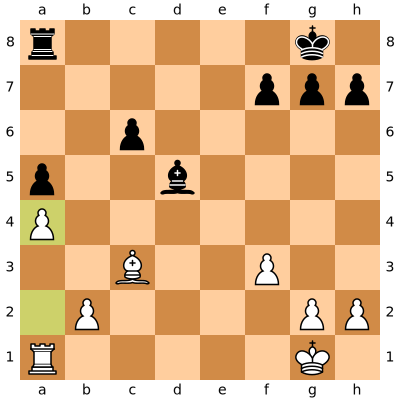

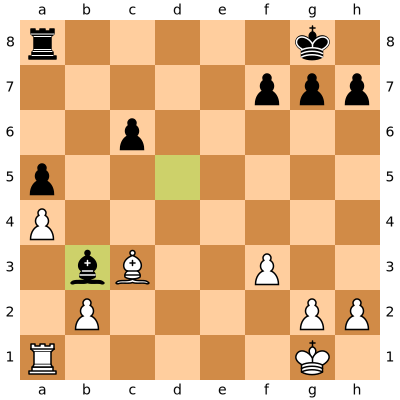

total simulations: 160 depth: 7
[{'move': 'a1a3', 'total_score': 37.508998556634353, 'mcts_score': 0.75017997113268708, 'visit_count': 50, 'score': 0.25016871}, {'move': 'g1f2', 'total_score': 27.952468163548584, 'mcts_score': 0.73559126746180481, 'visit_count': 38, 'score': 0.55446696}, {'move': 'g2g4', 'total_score': 16.547987179375422, 'mcts_score': 0.71947770345110529, 'visit_count': 23, 'score': 0.0087596951}]


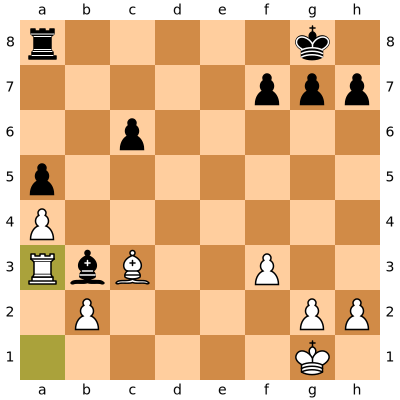

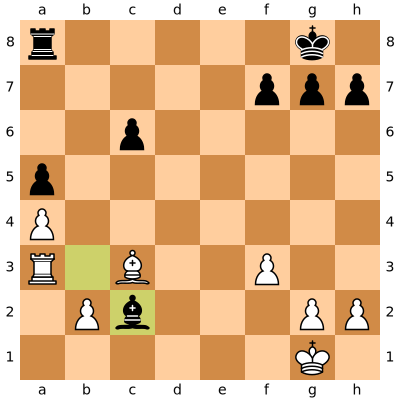

total simulations: 144 depth: 7
[{'move': 'g2g4', 'total_score': 20.023049903040288, 'mcts_score': 0.71510892510858171, 'visit_count': 28, 'score': 0.028399467}, {'move': 'g1f2', 'total_score': 18.485064282717502, 'mcts_score': 0.71096401087375005, 'visit_count': 26, 'score': 0.4633911}, {'move': 'a3a1', 'total_score': 15.399178082483589, 'mcts_score': 0.69996264011289044, 'visit_count': 22, 'score': 0.04985274}]


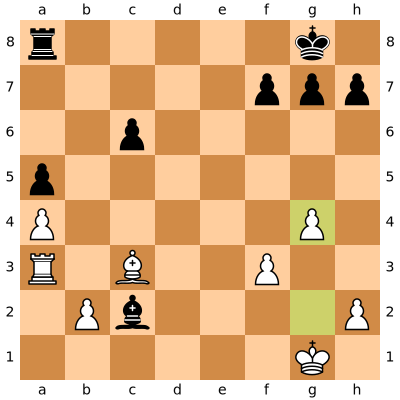

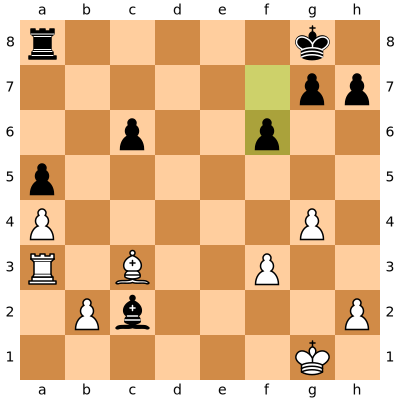

total simulations: 151 depth: 7
[{'move': 'a3a1', 'total_score': 28.614116248074307, 'mcts_score': 0.69790527434327576, 'visit_count': 41, 'score': 0.018106084}, {'move': 'g1f2', 'total_score': 18.916625718212845, 'mcts_score': 0.67559377565045875, 'visit_count': 28, 'score': 0.45212454}, {'move': 'h2h4', 'total_score': 13.774352671348103, 'mcts_score': 0.6559215557784811, 'visit_count': 21, 'score': 0.075687267}]


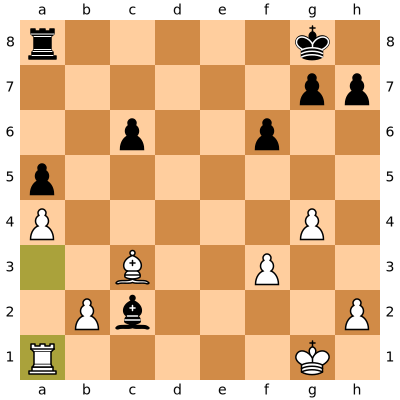

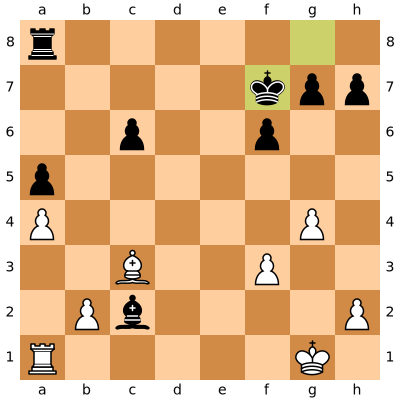

total simulations: 166 depth: 7
[{'move': 'g1f2', 'total_score': 40.542482109784288, 'mcts_score': 0.65391100177071437, 'visit_count': 62, 'score': 0.48207852}, {'move': 'g1g2', 'total_score': 19.836950158651948, 'mcts_score': 0.61990469245787339, 'visit_count': 32, 'score': 0.027056897}, {'move': 'h2h4', 'total_score': 9.7356212718123345, 'mcts_score': 0.57268360422425502, 'visit_count': 17, 'score': 0.1024861}]


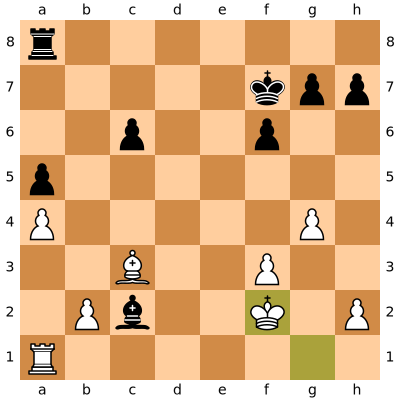

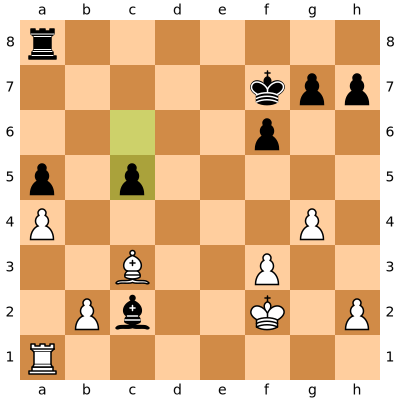

total simulations: 166 depth: 7
[{'move': 'h2h4', 'total_score': 26.642935505508426, 'mcts_score': 0.63435560727401019, 'visit_count': 42, 'score': 0.16373205}, {'move': 'f2g3', 'total_score': 19.827493347232497, 'mcts_score': 0.61960916710101555, 'visit_count': 32, 'score': 0.039566442}, {'move': 'f2e3', 'total_score': 16.411167762716744, 'mcts_score': 0.60782102824876827, 'visit_count': 27, 'score': 0.33451384}]


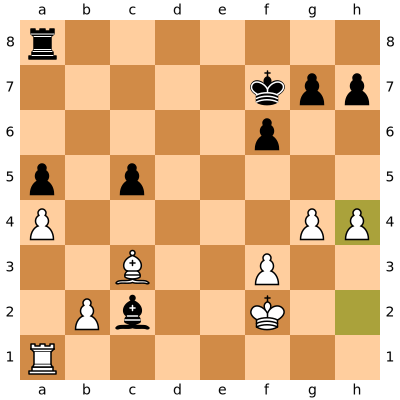

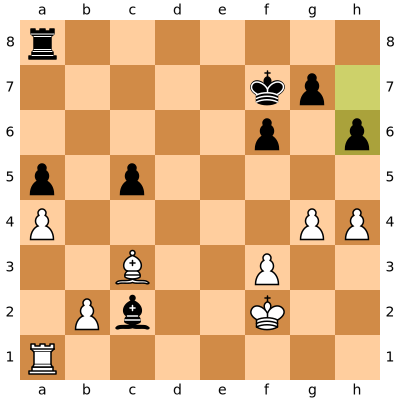

total simulations: 153 depth: 7
[{'move': 'h4h5', 'total_score': 22.985475663662285, 'mcts_score': 0.63848543510173017, 'visit_count': 36, 'score': 0.13377129}, {'move': 'f2e3', 'total_score': 12.71166136802233, 'mcts_score': 0.60531720800106337, 'visit_count': 21, 'score': 0.34163734}, {'move': 'f2g3', 'total_score': 11.343498324463511, 'mcts_score': 0.59702622760334267, 'visit_count': 19, 'score': 0.033795785}]


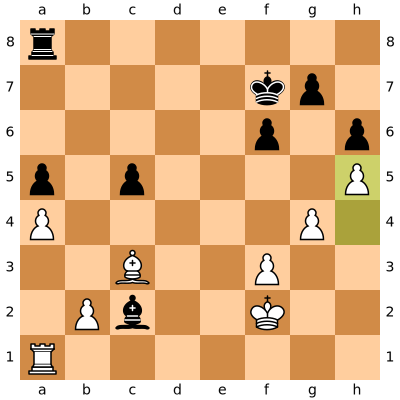

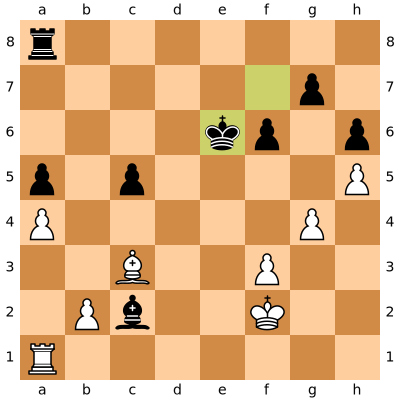

total simulations: 166 depth: 7
[{'move': 'c3d2', 'total_score': 19.23901672722339, 'mcts_score': 0.58300050688555727, 'visit_count': 33, 'score': 0.010296325}, {'move': 'a1e1', 'total_score': 17.303605245263089, 'mcts_score': 0.57678684150876969, 'visit_count': 30, 'score': 0.22496741}, {'move': 'f2e2', 'total_score': 15.418613015874746, 'mcts_score': 0.5710597413286943, 'visit_count': 27, 'score': 0.027613243}]


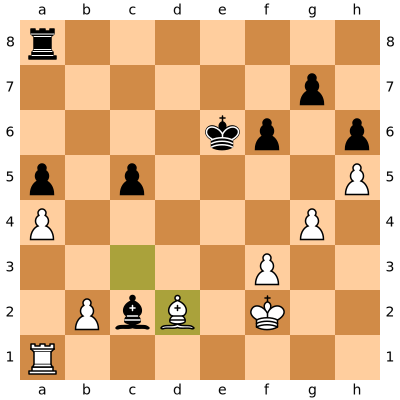

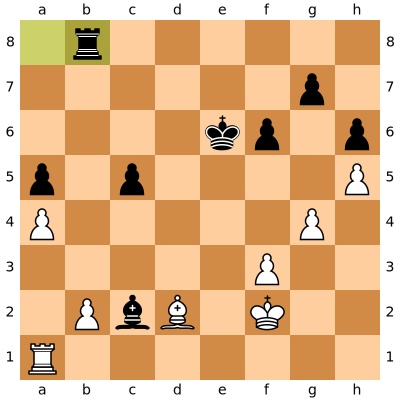

total simulations: 180 depth: 7
[{'move': 'd2a5', 'total_score': 80.747471050851388, 'mcts_score': 0.80747471050851383, 'visit_count': 100, 'score': 0.099346623}, {'move': 'd2c3', 'total_score': 16.018082440430305, 'mcts_score': 0.7280946563831957, 'visit_count': 22, 'score': 0.42806616}, {'move': 'f2g3', 'total_score': 11.942493510609973, 'mcts_score': 0.70249961827117491, 'visit_count': 17, 'score': 0.0082305055}]


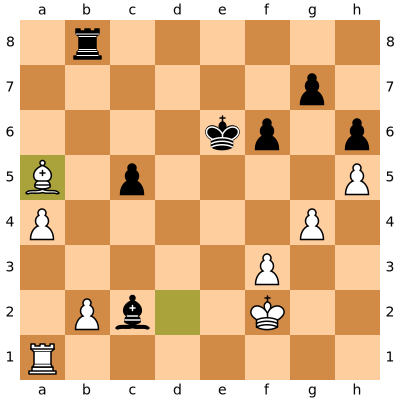

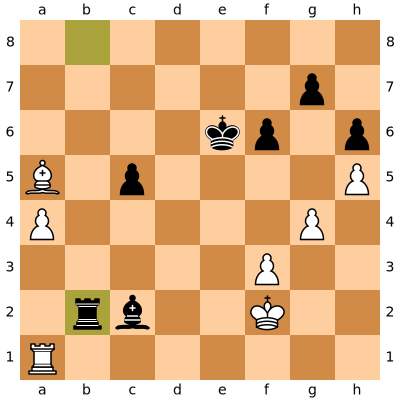

total simulations: 183 depth: 7
[{'move': 'a5d2', 'total_score': 33.461343563127933, 'mcts_score': 0.77817078053785893, 'visit_count': 43, 'score': 0.044812854}, {'move': 'a5c3', 'total_score': 31.779567800000788, 'mcts_score': 0.77511140975611681, 'visit_count': 41, 'score': 0.55237186}, {'move': 'a5e1', 'total_score': 15.350859612154661, 'mcts_score': 0.73099331486450769, 'visit_count': 21, 'score': 0.013926013}]


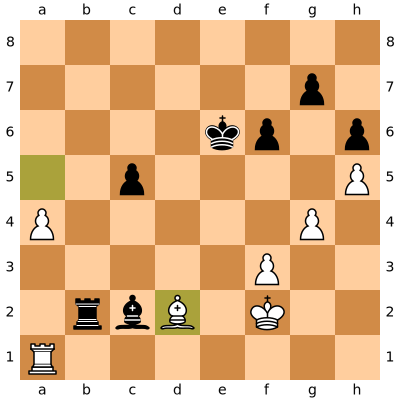

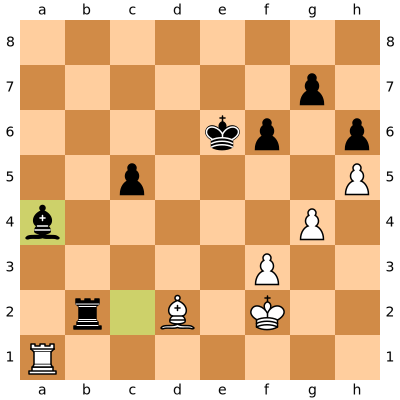

total simulations: 173 depth: 7
[{'move': 'a1a4', 'total_score': 43.805180863401887, 'mcts_score': 0.38765646781771579, 'visit_count': 113, 'score': 0.14470528}, {'move': 'f2e3', 'total_score': 6.7580189184065338, 'mcts_score': 0.30718267810938787, 'visit_count': 22, 'score': 0.52537519}, {'move': 'f2e1', 'total_score': 4.0848168639975624, 'mcts_score': 0.27232112426650418, 'visit_count': 15, 'score': 0.042288635}]


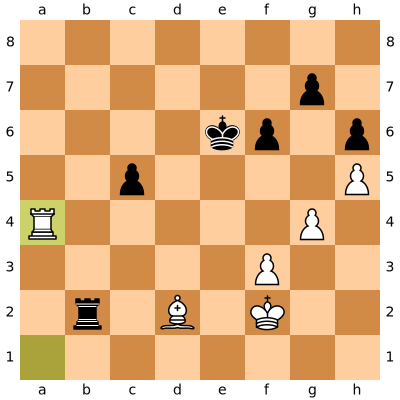

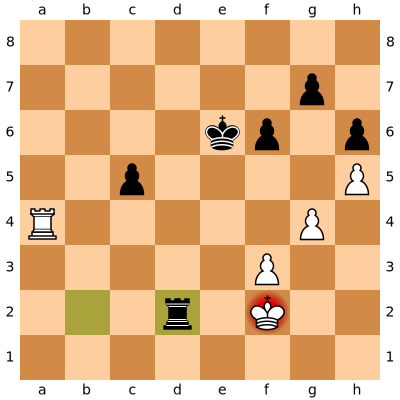

total simulations: 275 depth: 7
[{'move': 'f2e3', 'total_score': 75.793618380404027, 'mcts_score': 0.33097649947774682, 'visit_count': 229, 'score': 0.74335116}, {'move': 'f2e1', 'total_score': 4.1412429992108573, 'mcts_score': 0.20706214996054287, 'visit_count': 20, 'score': 0.05148844}, {'move': 'f2f1', 'total_score': 2.2519993877114404, 'mcts_score': 0.17323072213164925, 'visit_count': 13, 'score': 0.0084316218}]


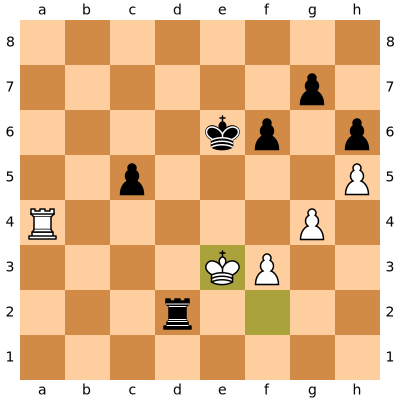

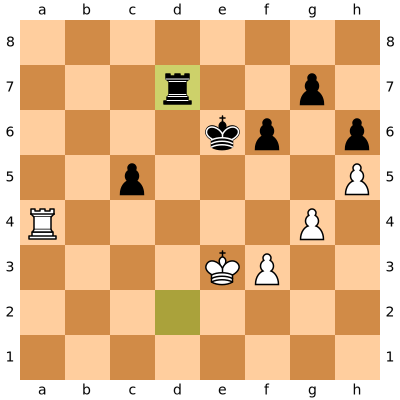

total simulations: 181 depth: 7
[{'move': 'e3e4', 'total_score': 23.7636497527904, 'mcts_score': 0.36005529928470303, 'visit_count': 66, 'score': 0.15090203}, {'move': 'a4a8', 'total_score': 6.4779206190095966, 'mcts_score': 0.34094319047418931, 'visit_count': 19, 'score': 0.0064716456}, {'move': 'a4a2', 'total_score': 3.2540534423155272, 'mcts_score': 0.29582304021050249, 'visit_count': 11, 'score': 0.0058261394}]


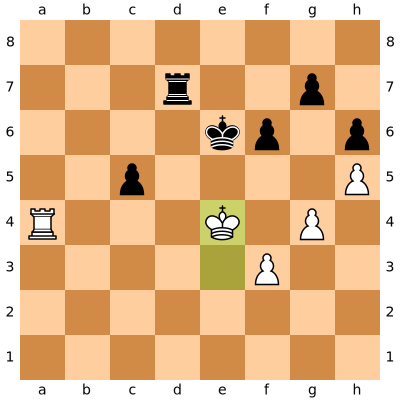

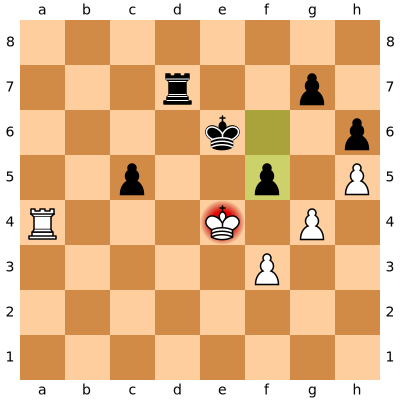

total simulations: 208 depth: 7
[{'move': 'g4f5', 'total_score': 121.6751083758882, 'mcts_score': 0.60534879788999107, 'visit_count': 201, 'score': 0.80493385}, {'move': 'e4e3', 'total_score': 1.1504276519048526, 'mcts_score': 0.28760691297621316, 'visit_count': 4, 'score': 0.035987727}, {'move': 'e4f4', 'total_score': 0.62989664556551861, 'mcts_score': 0.20996554852183955, 'visit_count': 3, 'score': 0.15907845}]


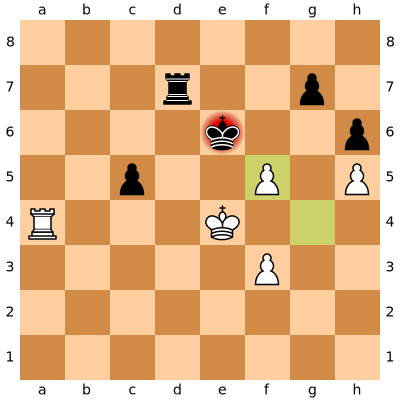

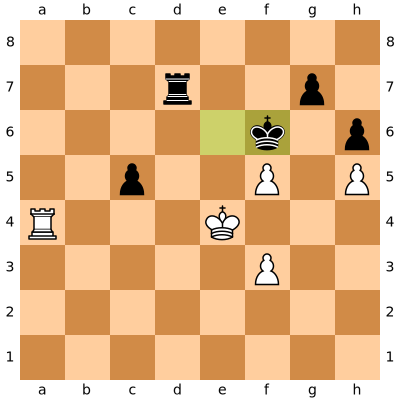

total simulations: 332 depth: 7
[{'move': 'a4a6', 'total_score': 62.536197672661572, 'mcts_score': 0.45982498288721746, 'visit_count': 136, 'score': 0.60800683}, {'move': 'e4f4', 'total_score': 48.753477147448407, 'mcts_score': 0.45142108469859638, 'visit_count': 108, 'score': 0.041035231}, {'move': 'f3f4', 'total_score': 13.530605558791038, 'mcts_score': 0.39795898702326582, 'visit_count': 34, 'score': 0.059487328}]


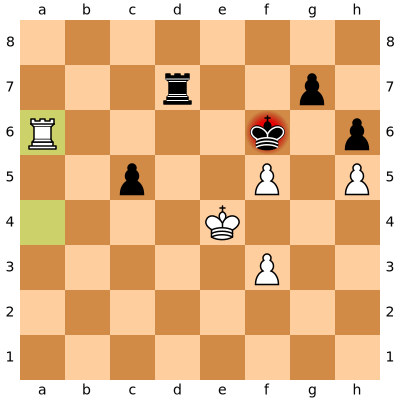

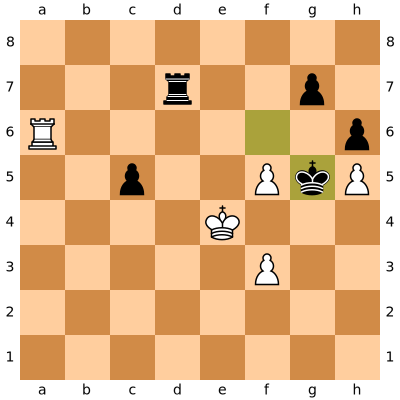

total simulations: 288 depth: 7
[{'move': 'a6c6', 'total_score': 48.827336672659726, 'mcts_score': 0.46063525162886532, 'visit_count': 106, 'score': 0.14955655}, {'move': 'f3f4', 'total_score': 28.189692091407682, 'mcts_score': 0.44046393892824504, 'visit_count': 64, 'score': 0.19126093}, {'move': 'a6g6', 'total_score': 12.454148410447182, 'mcts_score': 0.40174672291765101, 'visit_count': 31, 'score': 0.53869814}]


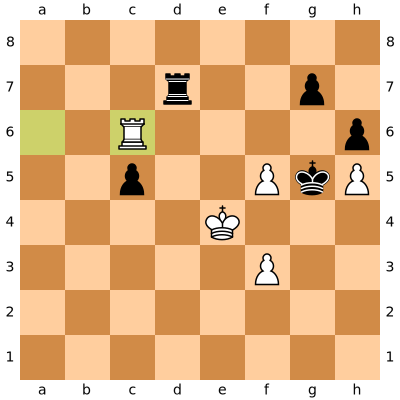

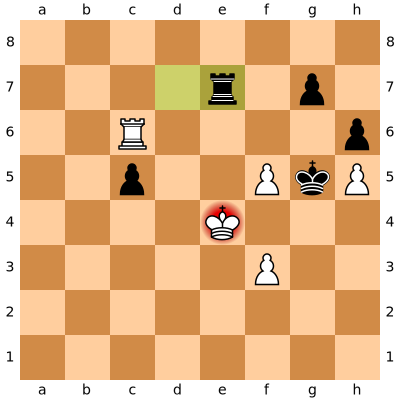

total simulations: 214 depth: 7
[{'move': 'c6e6', 'total_score': 72.1755208444186, 'mcts_score': 0.43742739905708244, 'visit_count': 165, 'score': 0.71653235}, {'move': 'e4d5', 'total_score': 13.928552811537564, 'mcts_score': 0.37644737328479905, 'visit_count': 37, 'score': 0.23341867}, {'move': 'e4d3', 'total_score': 3.4155391081908952, 'mcts_score': 0.28462825901590794, 'visit_count': 12, 'score': 0.050049003}]


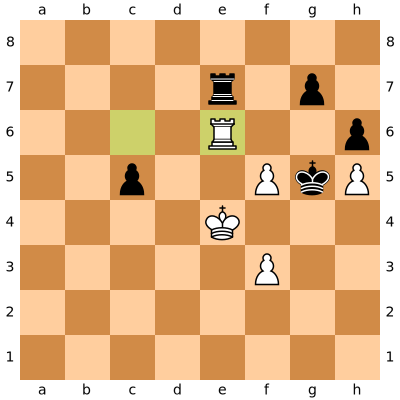

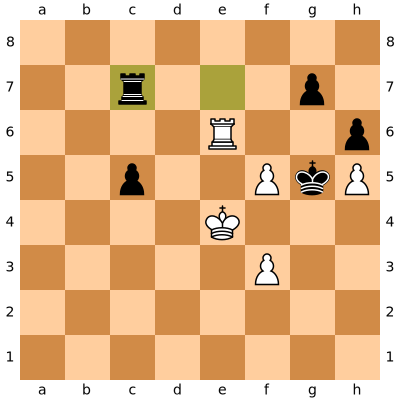

total simulations: 299 depth: 7
[{'move': 'e6g6', 'total_score': 20.407964295207204, 'mcts_score': 0.30459648201801798, 'visit_count': 67, 'score': 0.40009806}, {'move': 'f3f4', 'total_score': 15.930705670309498, 'mcts_score': 0.29501306796869442, 'visit_count': 54, 'score': 0.30271515}, {'move': 'e6e5', 'total_score': 7.460429707571766, 'mcts_score': 0.25725619681281953, 'visit_count': 29, 'score': 0.013145108}]


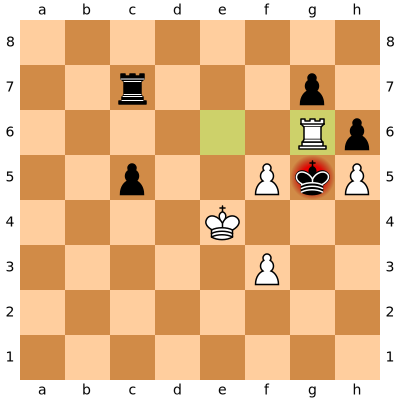

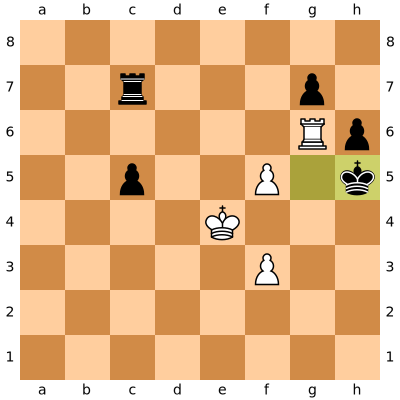

total simulations: 255 depth: 7
[{'move': 'g6g2', 'total_score': 18.838727189792777, 'mcts_score': 0.30883159327529142, 'visit_count': 61, 'score': 0.045328777}, {'move': 'e4d5', 'total_score': 13.219421126076046, 'mcts_score': 0.29376491391280102, 'visit_count': 45, 'score': 0.22282283}, {'move': 'g6g1', 'total_score': 10.792700909305911, 'mcts_score': 0.28401844498173451, 'visit_count': 38, 'score': 0.056373689}]


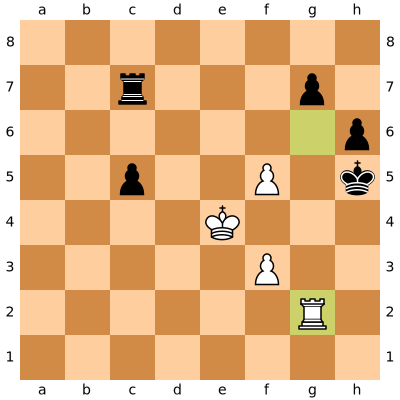

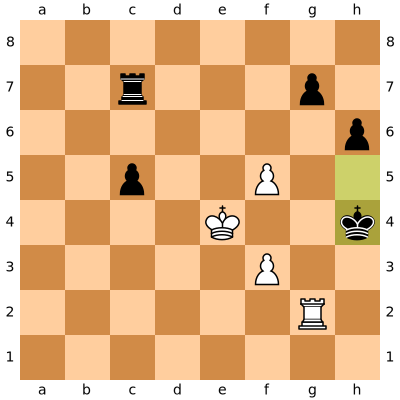

total simulations: 199 depth: 7
[{'move': 'e4f4', 'total_score': 18.779555719921046, 'mcts_score': 0.3912407441650218, 'visit_count': 48, 'score': 0.05627929}, {'move': 'e4d5', 'total_score': 12.720254443062785, 'mcts_score': 0.37412513067831721, 'visit_count': 34, 'score': 0.044615369}, {'move': 'g2g4', 'total_score': 4.6924566651865147, 'mcts_score': 0.31283044434576762, 'visit_count': 15, 'score': 0.072149046}]


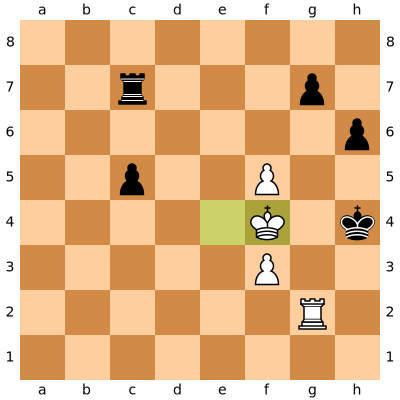

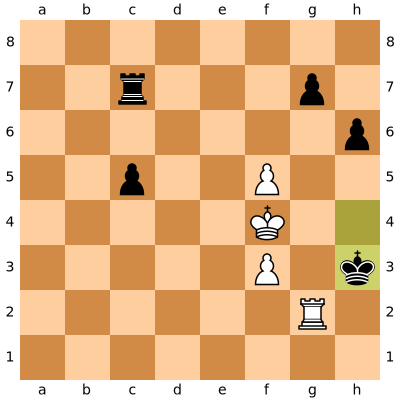

total simulations: 212 depth: 7
[{'move': 'g2g6', 'total_score': 74.328939257247029, 'mcts_score': 0.45600576231439893, 'visit_count': 163, 'score': 0.23260839}, {'move': 'g2g1', 'total_score': 4.0912815446438628, 'mcts_score': 0.31471396497260484, 'visit_count': 13, 'score': 0.086259939}, {'move': 'g2g3', 'total_score': 1.6225065538219487, 'mcts_score': 0.23178665054599268, 'visit_count': 7, 'score': 0.24317151}]


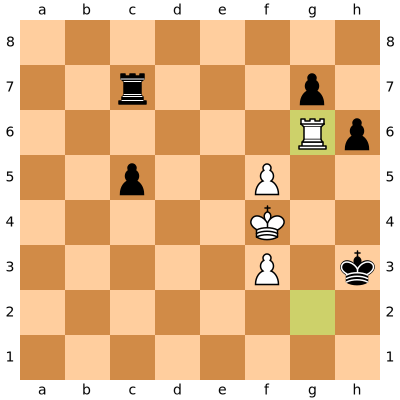

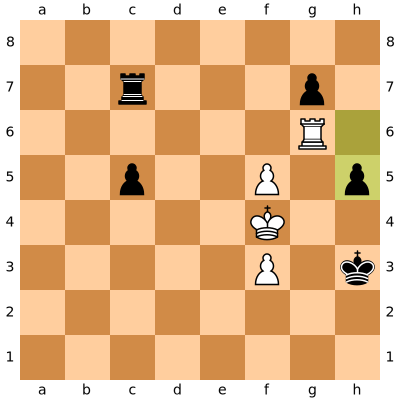

total simulations: 284 depth: 7
[{'move': 'g6g1', 'total_score': 17.235885627872413, 'mcts_score': 0.24275895250524526, 'visit_count': 71, 'score': 0.021310626}, {'move': 'g6g3', 'total_score': 10.797259782747714, 'mcts_score': 0.22494291214057738, 'visit_count': 48, 'score': 0.04685837}, {'move': 'f5f6', 'total_score': 6.8790557038158697, 'mcts_score': 0.2023251677592903, 'visit_count': 34, 'score': 0.23601797}]


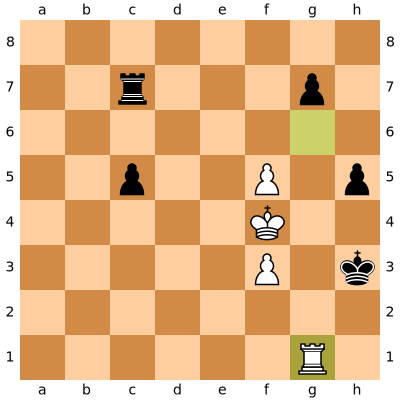

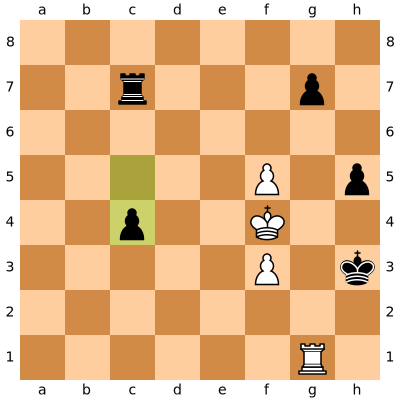

total simulations: 200 depth: 7
[{'move': 'g1h1', 'total_score': 9.0857397029149762, 'mcts_score': 0.24556053251121557, 'visit_count': 37, 'score': 0.32288909}, {'move': 'f5f6', 'total_score': 4.9365315387329849, 'mcts_score': 0.2146318060318689, 'visit_count': 23, 'score': 0.11057497}, {'move': 'g1a1', 'total_score': 3.7446208198648456, 'mcts_score': 0.19708530630867607, 'visit_count': 19, 'score': 0.014292626}]


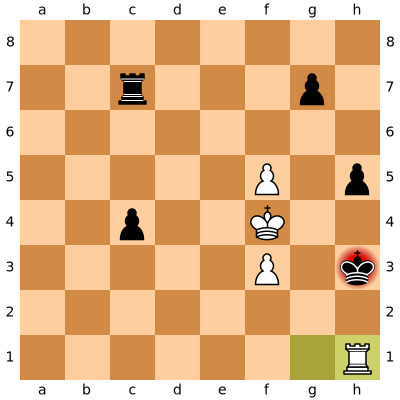

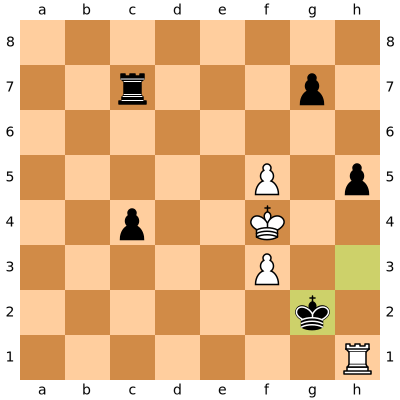

total simulations: 249 depth: 7
[{'move': 'h1h5', 'total_score': 5.0620928711625863, 'mcts_score': 0.095511186248350685, 'visit_count': 53, 'score': 0.91882604}, {'move': 'h1c1', 'total_score': 4.5007568048740687, 'mcts_score': 0.091852179691307531, 'visit_count': 49, 'score': 0.040794574}, {'move': 'h1a1', 'total_score': 3.8502917232164737, 'mcts_score': 0.087506630073101679, 'visit_count': 44, 'score': 0.0050217747}]


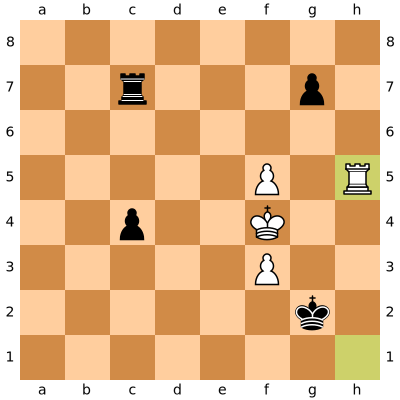

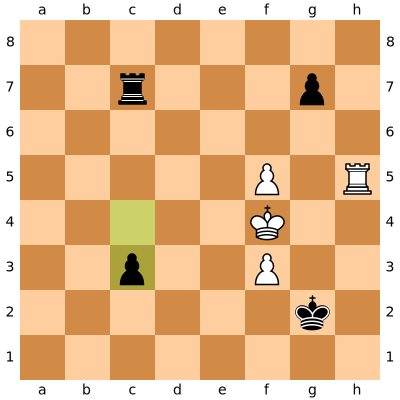

total simulations: 226 depth: 7
[{'move': 'h5h8', 'total_score': 4.6708495706788131, 'mcts_score': 0.099379778099549218, 'visit_count': 47, 'score': 0.2250201}, {'move': 'h5g5', 'total_score': 0.99039821245846549, 'mcts_score': 0.047161819640879309, 'visit_count': 21, 'score': 0.37456471}, {'move': 'h5h1', 'total_score': 0.54851496966254853, 'mcts_score': 0.032265586450738147, 'visit_count': 17, 'score': 0.017771676}]


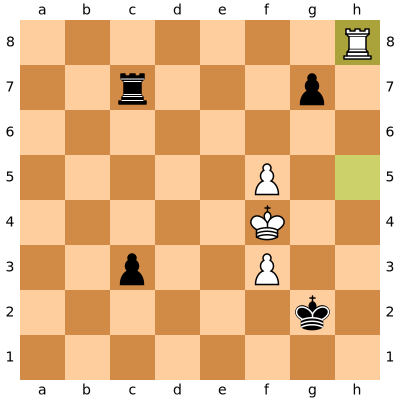

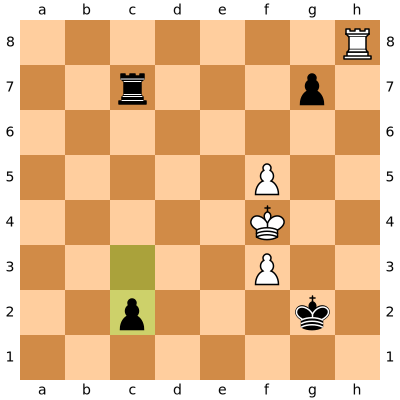

total simulations: 232 depth: 7
[{'move': 'h8h1', 'total_score': 0.86937197114833442, 'mcts_score': 0.045756419534122864, 'visit_count': 19, 'score': 0.23376873}, {'move': 'f4g5', 'total_score': 0.13467177442824962, 'mcts_score': 0.022445295738041604, 'visit_count': 6, 'score': 0.0039429008}, {'move': 'f4g4', 'total_score': 0.25348332071558821, 'mcts_score': 0.018105951479684874, 'visit_count': 14, 'score': 0.049455412}]


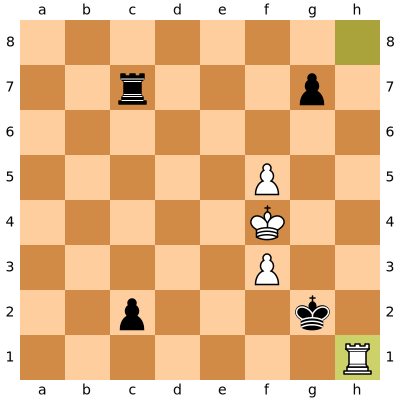

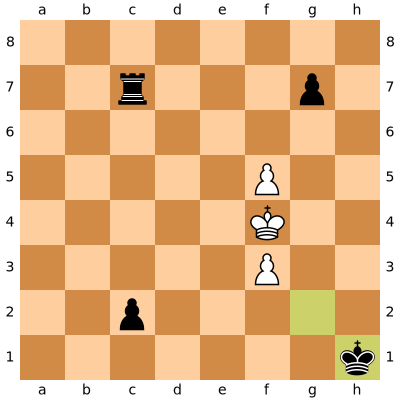

total simulations: 216 depth: 7
[{'move': 'f4e4', 'total_score': 0.34032584614941597, 'mcts_score': 0.010635182692169249, 'visit_count': 32, 'score': 0.090767562}, {'move': 'f4e3', 'total_score': 0.29898640559643863, 'mcts_score': 0.0093433251748887072, 'visit_count': 32, 'score': 0.060909815}, {'move': 'f4g3', 'total_score': 0.28842674686703507, 'mcts_score': 0.0093040886086140345, 'visit_count': 31, 'score': 0.055104941}]


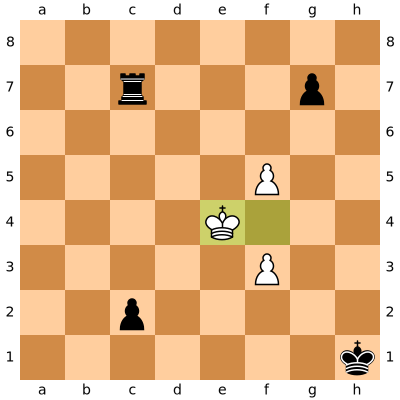

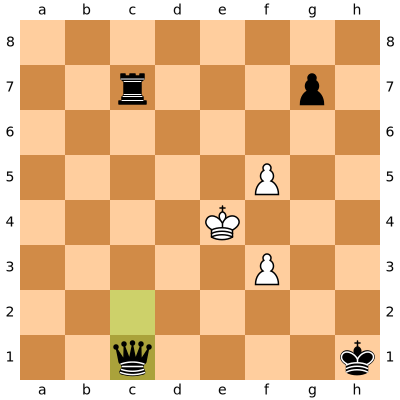

total simulations: 209 depth: 7
[{'move': 'f5f6', 'total_score': 0.33011211563838194, 'mcts_score': 0.0091697809899550543, 'visit_count': 36, 'score': 0.47052756}, {'move': 'e4d3', 'total_score': 0.32898897356306989, 'mcts_score': 0.0091385825989741629, 'visit_count': 36, 'score': 0.023180617}, {'move': 'e4d4', 'total_score': 0.23352359335977124, 'mcts_score': 0.0066721026674220352, 'visit_count': 35, 'score': 0.058428489}]


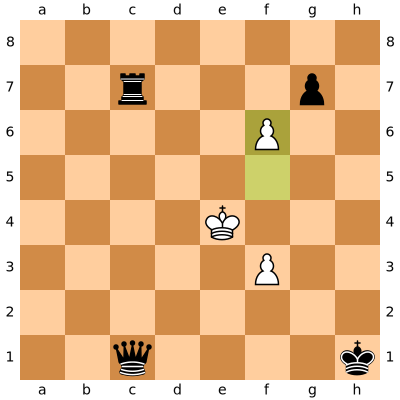

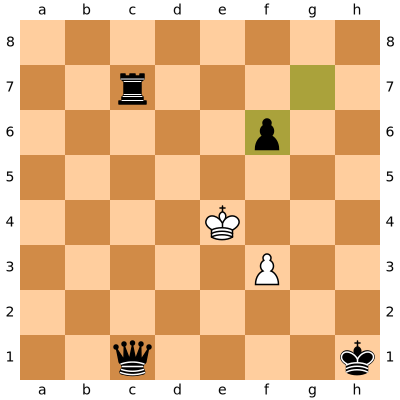

total simulations: 181 depth: 7
[{'move': 'e4d3', 'total_score': 0.32854496062232585, 'mcts_score': 0.008213624015558146, 'visit_count': 40, 'score': 0.031771578}, {'move': 'f3f4', 'total_score': 0.27735709533831232, 'mcts_score': 0.0071117203932900596, 'visit_count': 39, 'score': 0.072744042}, {'move': 'e4f5', 'total_score': 0.12979904399014119, 'mcts_score': 0.0035080822700038162, 'visit_count': 37, 'score': 0.78987575}]
best move:
{'move': 'f3f4', 'total_score': 0.27735709533831232, 'mcts_score': 0.0071117203932900596, 'visit_count': 39, 'score': 0.072744042}


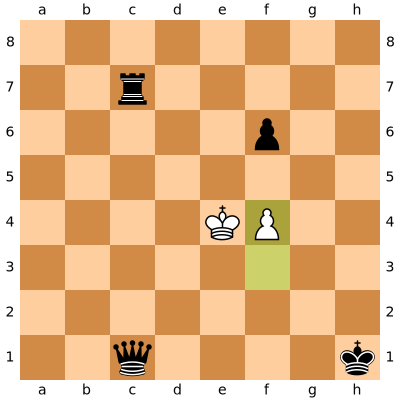

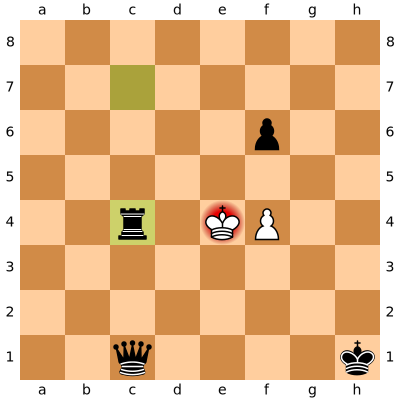

total simulations: 210 depth: 7
[{'move': 'e4d5', 'total_score': 0.40697812246679776, 'mcts_score': 0.0075366318975332918, 'visit_count': 54, 'score': 0.17105702}, {'move': 'e4f5', 'total_score': 0.33818589363844087, 'mcts_score': 0.0063808659177064311, 'visit_count': 53, 'score': 0.55182451}, {'move': 'e4d3', 'total_score': 0.25364444954045451, 'mcts_score': 0.0048777778757779717, 'visit_count': 52, 'score': 0.1547247}]
best move:
{'move': 'e4f5', 'total_score': 0.33818589363844087, 'mcts_score': 0.0063808659177064311, 'visit_count': 53, 'score': 0.55182451}


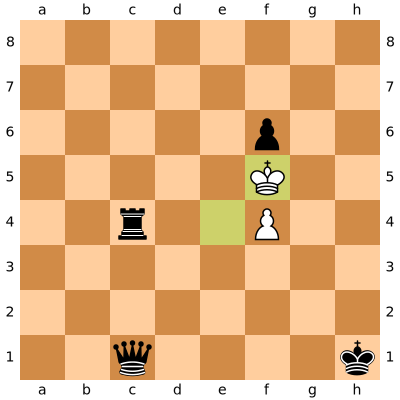

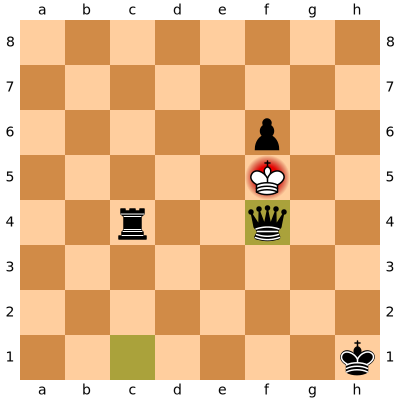

total simulations: 206 depth: 7
[{'move': 'f5e6', 'total_score': 0.54419649886668886, 'mcts_score': 0.0052326586429489313, 'visit_count': 104, 'score': 0.57460785}, {'move': 'f5g6', 'total_score': 0.48220702287940187, 'mcts_score': 0.0047275198321509986, 'visit_count': 102, 'score': 0.42539215}]


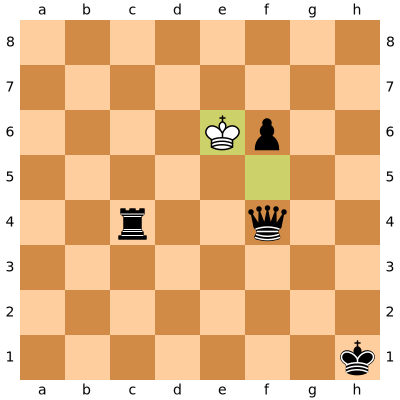

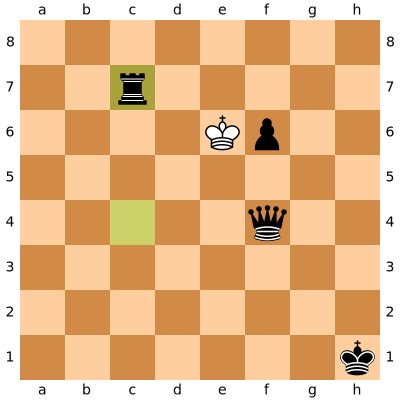

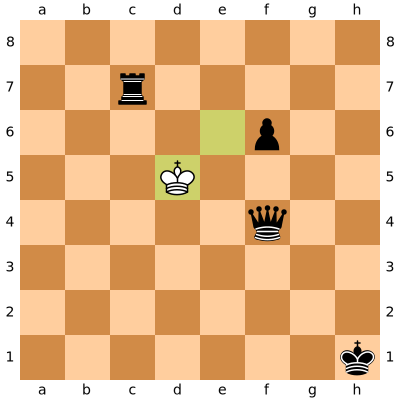

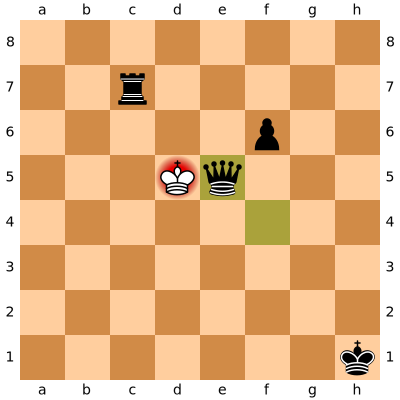

0-1 104


In [3]:
while not board.is_game_over():
    if board.turn == chess.WHITE:
        move = gruefish.best_move(board, depth=7, time_limit=10, debug=True, end_early_eval=16)
        board.push_uci(move['move'])
#         shitfish.setfenposition(board.fen())
#         board.push_uci(shitfish.bestmove()['move'])
#         clear_output()
        display(board)
    else:
#         move = gruefish.best_move(board, time_limit=20, debug=True, end_early_eval=21)
#         board.push_uci(move['move'])
        shitfish.setfenposition(board.fen())
        board.push_uci(shitfish.bestmove()['move'])
        display(board)
        
print(board.result(), len(board.move_stack))

In [78]:
board2= chess.Board(fen=board.fen())
board2.result()

'*'

In [4]:
temp_board = chess.Board()

In [4]:
temp_board.pop()
temp_board

NameError: name 'temp_board' is not defined

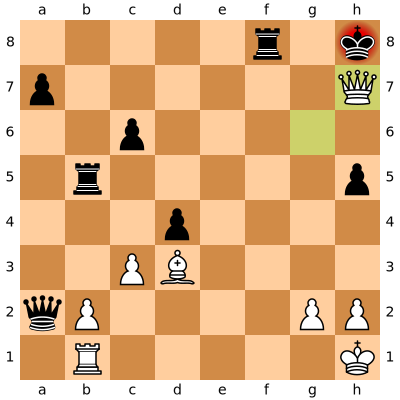

In [62]:
if len(board.move_stack) > len(temp_board.move_stack):
    temp_board.push(board.move_stack[len(temp_board.move_stack)])

temp_board

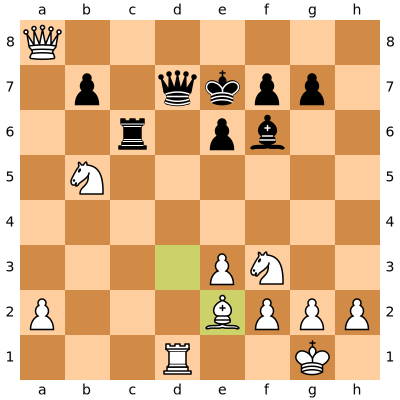

In [15]:
board.pop()
board

In [6]:
gruefish.init_explore = 0.5
gruefish.explore = 0.2

In [17]:
gruefish.clear_cache()
# board = chess.Board(fen=bad_decisions[0])
move = gruefish.best_move(board, depth=3, time_limit=20, debug=True)

total simulations: 775 depth: 3
[{'total_score': 6.1530705012210092, 'move': 'd7f7', 'mcts_score': 0.044912923366576707, 'score': 0.0034301705, 'visit_count': 137}, {'total_score': 1.2320997561954741, 'move': 'h5h6', 'mcts_score': 0.01785651820573151, 'score': 0.19312236, 'visit_count': 69}, {'total_score': 1.0574259106061512, 'move': 'd7d8', 'mcts_score': 0.016021604706153807, 'score': 0.086676612, 'visit_count': 66}]


In [18]:
board.push_uci('d7d2')

Move.from_uci('d7d2')

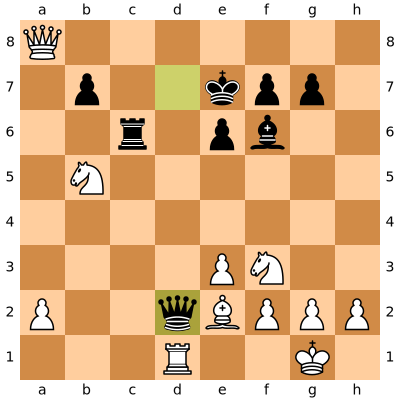

In [19]:
board

In [20]:
moves, score = gruefish.cache[board.fen()]
moves = sorted(moves, key=lambda x: x['mcts_score'], reverse=True)
print(score)
total_score = 0
total_simulations = 0

for move in moves:
    print(move)
    total_score += move['total_score']
    total_simulations += move['visit_count']
    
print(total_score, total_simulations, total_score/total_simulations)

0.840664
{'score': 0.15147108, 'total_score': 5.7922758467646451, 'visit_count': 6, 'mcts_score': 0.96537930779410752, 'move': 'f3d2'}
{'score': 0.57060665, 'total_score': 4.7785477902209905, 'visit_count': 5, 'mcts_score': 0.9557095580441981, 'move': 'd1d2'}
{'score': 0.23029783, 'total_score': 4.6397084717852213, 'visit_count': 5, 'mcts_score': 0.92794169435704421, 'move': 'a8b7'}
{'score': 0.00043170981, 'total_score': 0, 'visit_count': 0, 'mcts_score': 0, 'move': 'a2a3'}
{'score': 4.2470176e-05, 'total_score': 0, 'visit_count': 0, 'mcts_score': 0, 'move': 'a2a4'}
{'score': 0.0055722115, 'total_score': 0, 'visit_count': 0, 'mcts_score': 0, 'move': 'a8a3'}
{'score': 0.0016806052, 'total_score': 0, 'visit_count': 0, 'mcts_score': 0, 'move': 'a8a4'}
{'score': 2.2622327e-05, 'total_score': 0, 'visit_count': 0, 'mcts_score': 0, 'move': 'a8a5'}
{'score': 9.9287572e-05, 'total_score': 0, 'visit_count': 0, 'mcts_score': 0, 'move': 'a8a6'}
{'score': 0.0025667627, 'total_score': 0, 'visit_cou

In [31]:
stockfish.setfenposition(board.fen())
stockfish.bestmove()

{'info': {'depth': 20,
  'multipv': 1,
  'nodes': 23660942,
  'nps': 13315105,
  'pv': 'b2b6 e2e6 b6d8 d3g6 b7g7 g6h6 e8d6 g5f6 d4f6 e6f6 d6c4 f6g6 c8c7 g6g7 c7g7 h6e6 g7f7 c1c4 d8e7 e6e7 f7e7 a2c3 g8f7 c4c5 f7e8 f2f3 e7a7 c3b5 a7a1 g1f2 a1a2 f2g3',
  'score': {'eval': 'cp', 'value': -696},
  'seldepth': 39,
  'tbhits': 0,
  'time': 1777},
 'move': 'b2b6',
 'ponder': 'e2e6'}

In [32]:
board.fen()

'2r1n1k1/1r6/4pnp1/2pP2Bp/2Bb4/3Q3P/Nq2RPP1/2R3K1 b - - 1 37'

In [2]:
bad_decisions = [
    'r1b1k2r/2p1q1pp/1pnppn2/p2P1p2/2P5/P1BBPN2/1P3PPP/R2Q1RK1 b kq - 0 11',
    '1rb1k2r/1p2ppbp/3P1np1/p1n1N3/Pqp5/2N5/1PPQBPPP/R1B2RK1 b k - 0 14',
    '1K6/7P/8/8/8/4k3/8/8 w - - 7 171',
    '8/8/8/2k4K/P3P3/8/7P/8 w - - 0 30',
    'r1bqk2r/1p1p1ppp/2n1pb2/p1P5/QPP1n3/P3PN2/R4PPP/1NB1KB1R b Kkq - 2 9',
    '2r1n1k1/1r6/4pnp1/2pP2Bp/2Bb4/3Q3P/Nq2RPP1/2R3K1 b - - 1 37'
]